In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Prepare the landsat bands to be stacked using glob and sort

landsat_bands_data_path = "../tif/iowa.tif"
stack_band_paths = glob(landsat_bands_data_path)


In [10]:
stack_band_paths.sort()

In [11]:
stack_band_paths

['../tif/iowa.tif']

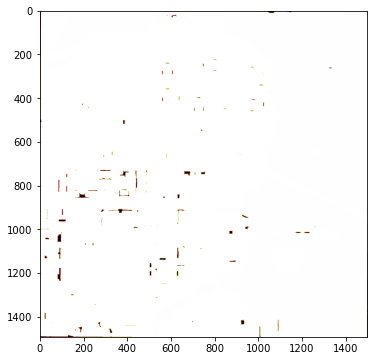

In [8]:
import rasterio
src = rasterio.open("../tif/iowa.tif")
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

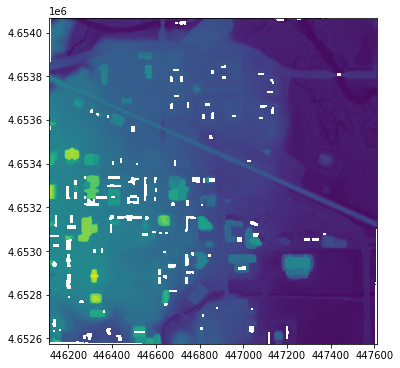

<AxesSubplot:>

In [49]:
from rasterio.plot import show
plt.figure(figsize=(10, 6))
show(src)

In [13]:
# Read raster/tif file
# --------------------
iowa_tif = '../tif/iowa.tif'
raster_iowa = rasterio.open(iowa_tif)
iowa_data = raster_iowa.read(1)

In [76]:
## Plot raster/tif image
# --------------------
import numpy as np
def plot_raster(rast_data, title='', figsize=(10,10)):
    """
    Plots population count in log scale(+1)
    """
    plt.figure(figsize = figsize)
    im1 = plt.imshow(np.log1p(rast_data),) # vmin=0, vmax=2.1)

    plt.title("{}".format(title), fontdict = {'fontsize': 20})  
    plt.axis('off')
    plt.colorbar(im1, fraction=0.03)




/tmp/ipykernel_22157/2583852133.py:9: RuntimeWarning: invalid value encountered in log1p
  im1 = plt.imshow(np.log1p(rast_data),) # vmin=0, vmax=2.1)


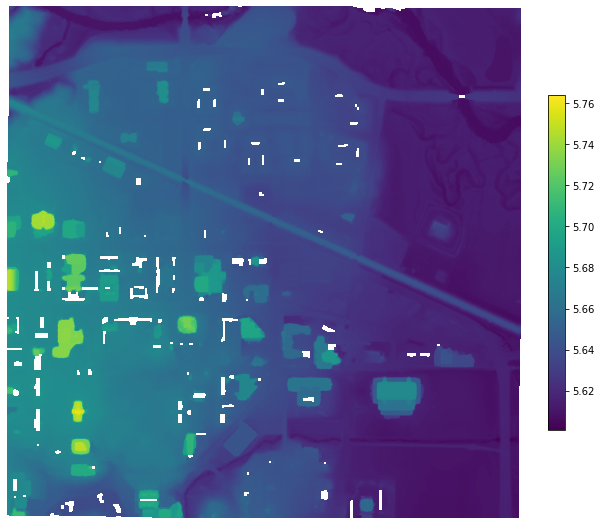

In [77]:
plot_raster(iowa_data, title='', figsize=(10,10))

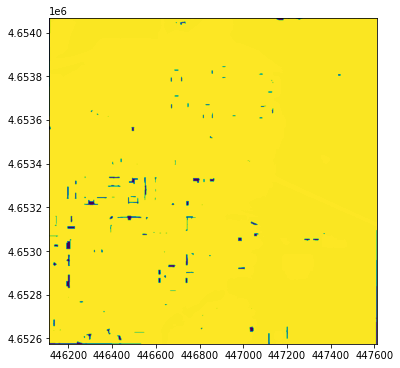

<AxesSubplot:>

In [78]:
plt.figure(figsize=(10, 6))
show((src, 1), transform=src.transform, cmap='viridis')


<AxesSubplot:>

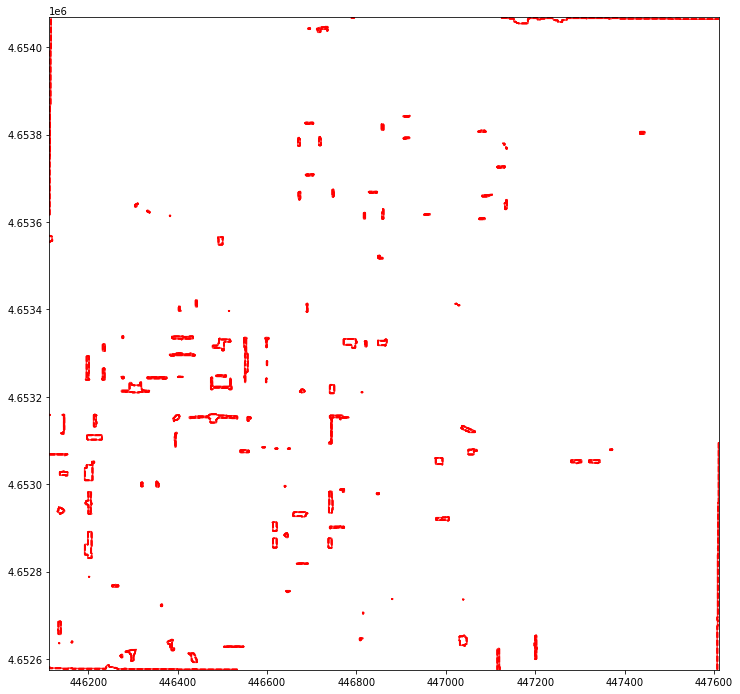

In [79]:
fig, ax = plt.subplots(1, figsize=(12, 12))
show((src, 1), ax=ax, contour=True, contour_label_kws={})

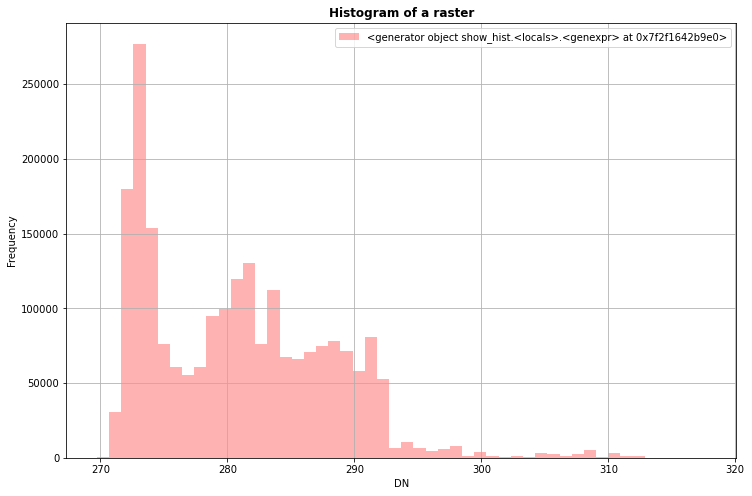

In [63]:
plt.figure(figsize=(12, 8))
from rasterio.plot import show_hist
show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
   histtype='stepfilled', title="Histogram of a raster")

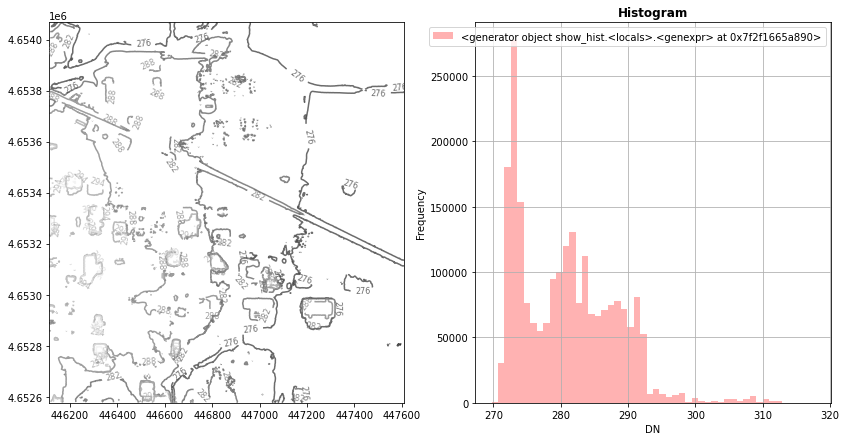

In [64]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show((src), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()

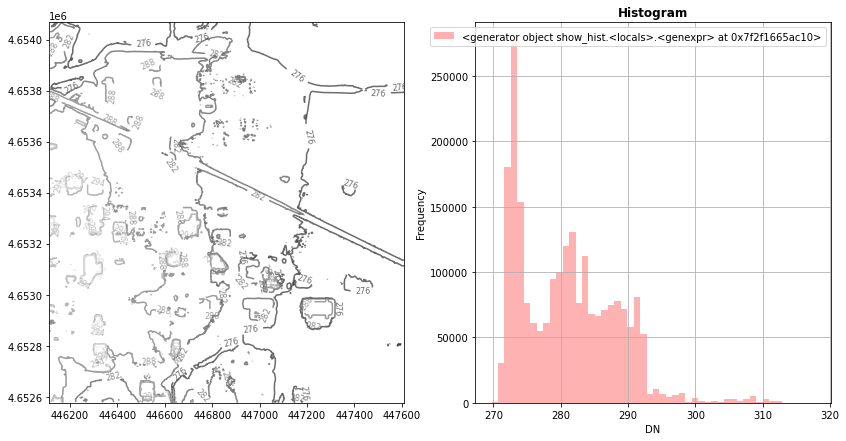

In [66]:
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(14,7))
show((src), cmap='Greys_r', contour=True, ax=axrgb)
show_hist(src, bins=50, histtype='stepfilled',
          lw=0.0, stacked=False, alpha=0.3, ax=axhist)
plt.show()


In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [85]:
iowa_data.shape

(1493, 1499)

In [86]:
ny, nx =iowa_data.shape

In [87]:
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

In [88]:
xv, yv = np.meshgrid(x, y)

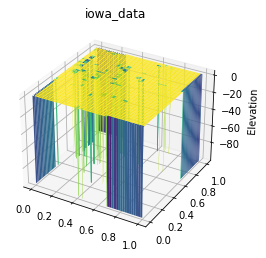

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('iowa_data')
ax.set_zlabel('Elevation')
iowa_data_100=iowa_data/100
iowa_3d=ax.plot_surface(xv,yv,iowa_data_100,cmap='viridis')

plt.show()